# Social Network Analysis @ UNIPI
### 27/06/2023

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# First Half

## Exercise 1: Synthetic Models [4 points]

Let G be a BA graph with N = 12743 and m = 5
- How many edges does G have? What is the average degree?
- What fraction of edges is incident on the largest hub?
- What’s the value of the p parameter of the comparable ER graph? What’s
its regime?

In [2]:
n = 12743
m = 5

In [3]:
g = nx.barabasi_albert_graph(n, m)

### 1.1 Number of edges and average degree

In [4]:
e = m*n
e

63715

In [5]:
avg_k = (2*e)/n 
avg_k_2 = (2*m)
print(avg_k, avg_k_2)

10.0 10


### 1.2 Fraction of edges incident to the largest hub

In [6]:
#degree exponent
gamma = 3 

In [7]:
kmax = m * n**(1/(gamma-1))
kmax

564.4244856488775

In [8]:
ratio = kmax/e
print(f'{round(ratio*100, 2)}%')

0.89%


### 1.3 Fraction of the p parameter of a comparable ER graph

In [9]:
#density
e_tot = n*(n-1)/2
p = e/e_tot
p

0.0007848061528802386

In [10]:
# regime
p < 1/n, p == 1/n, p > 1/n, p > np.log(n)/n #connected regime

(False, False, True, True)

## Exercise 2: Graph Construction [6 points]

Given 11 nodes - identified with numbers - and, at most, 20 edges build a
graph such that all the following conditions hold:
- The graph is composed by exactly two separated components;
- The clustering coefficient of nodes 3 and 4 is respectively 1/3 and 1;
- Nodes 4 and 9 are connected by a path of length 4;
- Node 9 has the lowest degree centrality;
- Node 6 has the highest closeness centrality;
- Edge (10, 11) has the lowest betweenness centrality;

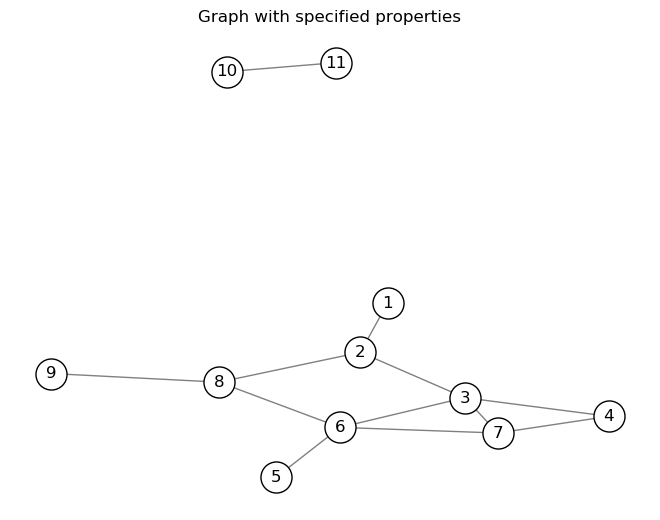

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes 1 to 11
G.add_nodes_from(range(1, 12))

# Add edges
G.add_edges_from([(1, 2), (2, 3), (3, 4), (3, 6), (4, 7), (6, 7), (8, 9), (5, 6), (8, 2), (8, 6), (3, 7), (10, 11)])

# Set the positions of nodes for visualization
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, edge_color='gray')
nodes = nx.draw_networkx_nodes(G, pos, node_size=500, node_color='white')
# Set edge color to red
nodes.set_edgecolor('black')

# Show the graph
plt.title('Graph with specified properties')
plt.axis('off')
plt.show()

In [12]:
nx.clustering(G, 3)

0.3333333333333333

In [13]:
nx.clustering(G, 4)

1.0

In [14]:
sorted(nx.centrality.degree_centrality(G).items(), key = lambda x: x[1])

[(1, 0.1),
 (5, 0.1),
 (9, 0.1),
 (10, 0.1),
 (11, 0.1),
 (4, 0.2),
 (2, 0.30000000000000004),
 (7, 0.30000000000000004),
 (8, 0.30000000000000004),
 (3, 0.4),
 (6, 0.4)]

In [15]:
sorted(nx.centrality.closeness_centrality(G).items(), key = lambda x: x[1])

[(10, 0.1),
 (11, 0.1),
 (1, 0.3047619047619048),
 (9, 0.3047619047619048),
 (5, 0.32000000000000006),
 (4, 0.3368421052631579),
 (7, 0.4266666666666667),
 (2, 0.45714285714285713),
 (8, 0.45714285714285713),
 (3, 0.49230769230769234),
 (6, 0.49230769230769234)]

In [16]:
sorted(nx.centrality.edge_betweenness_centrality(G).items(), key = lambda x: x[1])

[((10, 11), 0.01818181818181818),
 ((4, 7), 0.04848484848484847),
 ((3, 7), 0.05454545454545454),
 ((3, 4), 0.09696969696969694),
 ((6, 7), 0.10303030303030303),
 ((3, 6), 0.12121212121212122),
 ((2, 8), 0.13939393939393938),
 ((1, 2), 0.14545454545454545),
 ((5, 6), 0.14545454545454545),
 ((8, 9), 0.14545454545454545),
 ((2, 3), 0.1757575757575757),
 ((6, 8), 0.18787878787878784)]

## Exercise 3: Hypergraphs [4 points]
Given the hypergraph H:
- compute its incidence and adjacency matrixes;
- visualize its dual;
- visualize its left and right projections;
- visualize its 2-line graph;

In [17]:
import hypernetx as hnx

In [18]:
hed = {
    'A': (1, 2, 3, 9),
    'B': (7, 8, 10),
    'C': (3, 6),
    'D': (8, 7),
    'E': (5, 6, 10),
    'F': (1, 2, 3),
    'G': (2, 3, 4, 5),
    'H': (4, 5)
}


H = hnx.Hypergraph(hed)

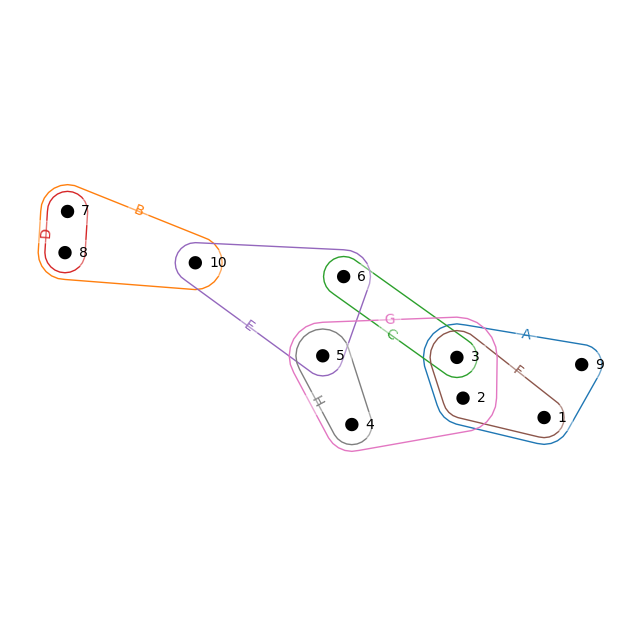

In [19]:
hnx.draw(H)

In [20]:
M_incidence = H.incidence_matrix()
M_incidence.toarray()

array([[1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0]], dtype=int32)

In [21]:
M_aux1 = H.auxiliary_matrix(s=1)
M_aux1.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 1],
       [1, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1],
       [1, 1, 1, 0, 1, 0, 1, 0]])

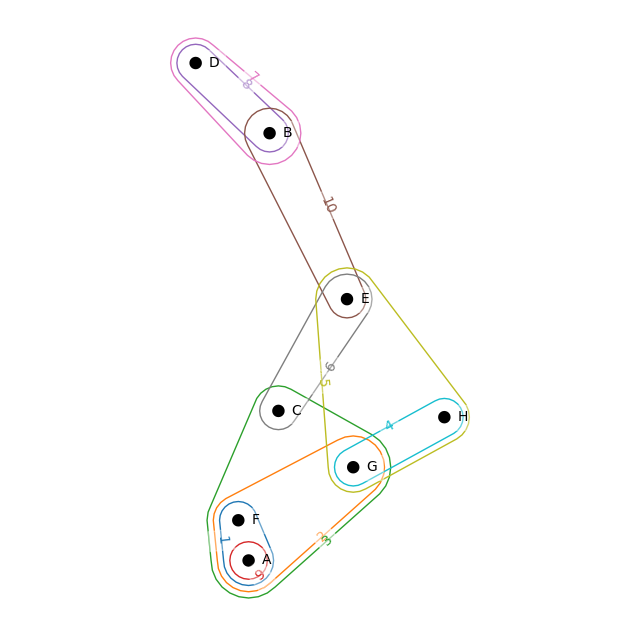

In [22]:
HD = H.dual()
hnx.draw(HD)

In [23]:
bi = H.bipartite()
nx.is_bipartite(bi)

True

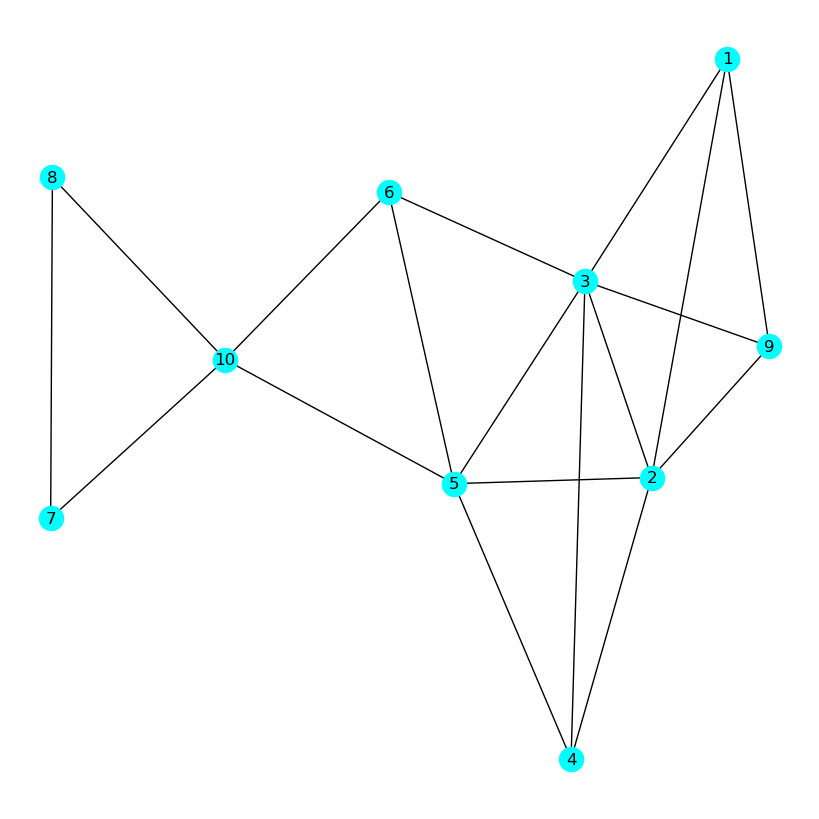

In [24]:
left = nx.projected_graph(bi, [1,2,3,4,5,6,7,8,9])
nx.draw(left, with_labels = True, node_color='cyan')

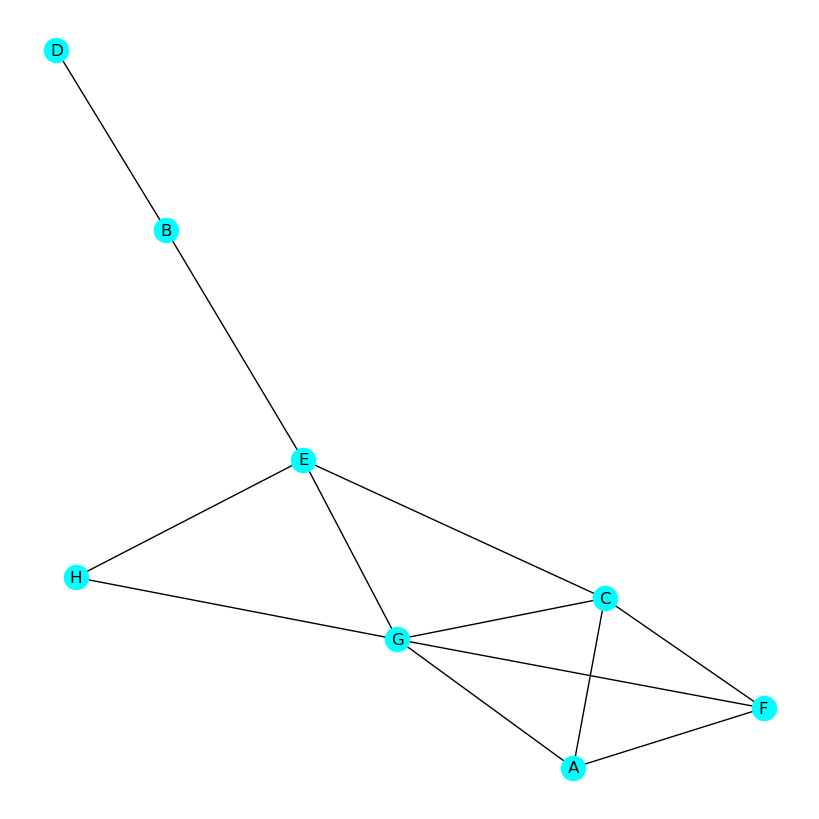

In [25]:
right = nx.projected_graph(bi, ['A','B','C','D','E','F','G','H'])
nx.draw(right, with_labels = True, node_color='cyan')

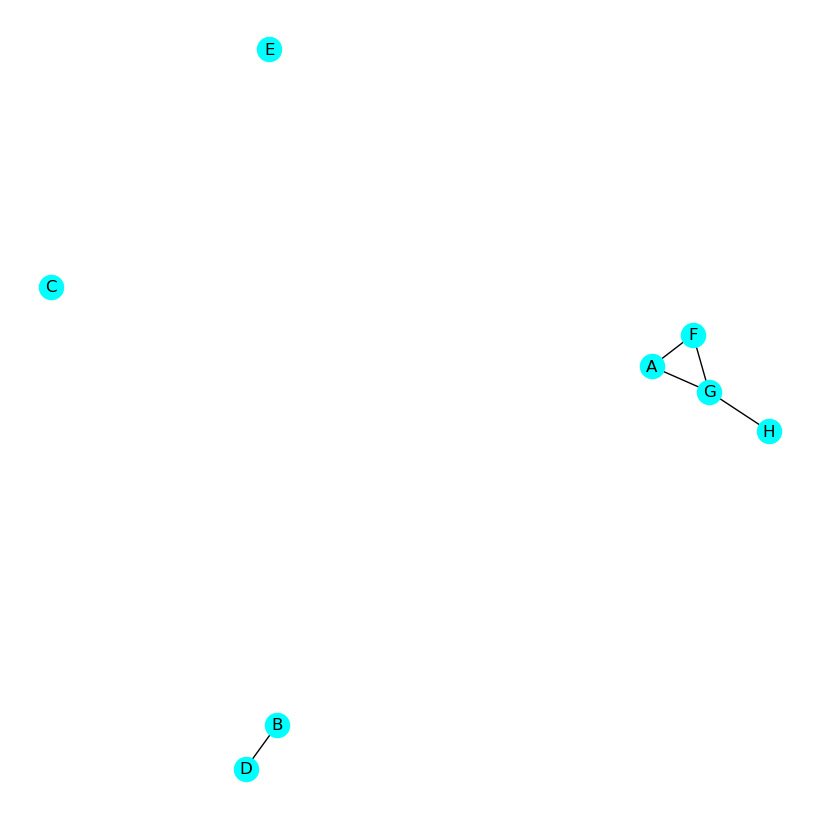

In [26]:
i = 2
A = dict()
g = dict()

A[i],names = H.edge_adjacency_matrix(s=i,index=True)
A[i] = A[i].todense()
g[i] = nx.from_numpy_matrix(A[i])  ## corresponding line graph
nx.relabel.relabel_nodes(g[i],names,copy=False)
nx.draw(g[i], with_labels=True, node_color='cyan');

By definition all edges in a 2-line graphs describes 2-walks, i.e. paths in which adjacent hyperedges share at least 2 nodes.

## Exercise 4: Open Questions [4 points]
- Q1: Compare two centrality measures of your choice, stating their similarities and differences and providing examples of which underlying process they may serve as proxy for. 
- Q2: Between an Erdos-Renyii random graph and a Barabasi-Albert scale-free one, which is more vulnerable to targeted attacks? Why?